In [1]:
import requests
from Config import ConsumerKey as key

In [2]:
key

In [3]:
# define our endpoint
endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')

In [4]:
# definte our payload
payload = {'apikey':key,
          'periodType':'month',
          'period':'1',
          'frequencyType':'daily',
          'frequency':'1',
          'startDate':'1651285293',
          'needExtendedHoursData':'true'}

In [5]:
# make a request
content = requests.get(url = endpoint, params = payload)

In [6]:
# convert it to a dictionary
data = content.json()

In [7]:
import pandas as pd

In [8]:
df2 = pd.json_normalize(data['candles']) 

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = df2['datetime']
y = df2['close']

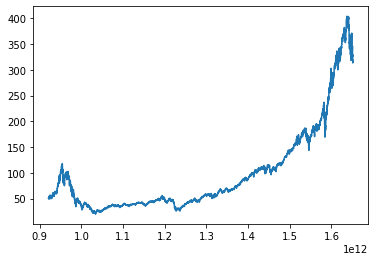

In [11]:
plt.plot(x,y)

In [12]:
import datetime

In [13]:
df = df2.copy()

In [14]:
df['datetime'] = df['datetime'].floordiv(1000)

In [15]:
def datetimeconvert(x):
    return datetime.datetime.fromtimestamp(x)

In [16]:
df['datetime'] = df['datetime'].apply(datetimeconvert)

In [17]:
x = df['datetime']
y = df['close']

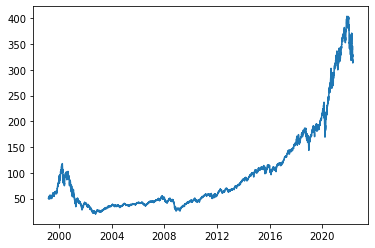

In [18]:
plt.plot(x,y)

In [19]:
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/chains'.format('QQQ')
endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/chains'

In [20]:
payload2 = {'apikey':key,
           'symbol':'QQQ',
           'strikeCount':'30',
           'fromDate':'2022-04-01'}

In [21]:
content2 = requests.get(url = endpoint2, params = payload2)

In [22]:
data2 = content2.json()

In [23]:
optionsChain = pd.json_normalize(data2) 

In [24]:
# optionsChain

In [25]:
# for i in optionsChain.columns:
#     print(i)

In [26]:
# optionsChain['callExpDateMap.2022-05-02:0.304.0']

In [27]:
# counter=0
# for i in range(12,1812):
#     counter+=1
#     print(i)
# print(counter)

In [28]:
# len(optionsChain.transpose())-12

In [29]:
categories = ['putCall','symbol', 'volatility','delta','gamma',
              'theta','vega','rho','openInterest','strikePrice']

In [30]:
# optionsChain.iat[0,12][0].get('putCall')

In [31]:
# for i in range(len(optionsChain.transpose())-12):
#     print(optionsChain.iat[0, i+12][0])

In [32]:
selected = pd.DataFrame(columns = categories, dtype = object)

In [33]:
# selected

In [34]:
for i in range(len(optionsChain.transpose())-12):
    for j in categories:
        # iterate and put values into 'selected' dataframe
        selected.at[i, j] = optionsChain.iat[0, i+12][0].get(j)

In [35]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,CALL,QQQ_050222C304,0,0,0,0,0,0,10,304
1,CALL,QQQ_050222C305,0,0,0,0,0,0,35,305
2,CALL,QQQ_050222C306,0,0,0,0,0,0,20,306
3,CALL,QQQ_050222C307,0,0,0,0,0,0,6,307
4,CALL,QQQ_050222C308,0,0,0,0,0,0,22,308
...,...,...,...,...,...,...,...,...,...,...
1795,PUT,QQQ_011924P370,24.204,-0.621,0.004,-0.023,1.633,-3.029,325,370
1796,PUT,QQQ_011924P375,24.015,-0.642,0.004,-0.022,1.604,-3.037,324,375
1797,PUT,QQQ_011924P380,23.826,-0.663,0.004,-0.021,1.569,-3.031,1769,380
1798,PUT,QQQ_011924P385,23.648,-0.683,0.004,-0.02,1.53,-3.013,1931,385


In [36]:
# optionsChain.iat[0,12]

In [37]:
# optionsChain.iat[0,1811]

In [38]:
# optionsChain.iat[0,12][0]

In [39]:
# selected['symbol'][0]

'QQQ_050222C304'

In [43]:
# a = selected['symbol'][0]
# a[4:10]

'050222'

In [49]:
# month = a[4:6]
# day = a[6:8]
# year = a[8:10]
# print(month, day, year)

05 02 22


In [142]:
# create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
dateSet = set()
for i in selected['symbol']:
#     print(selected['symbol'][4:10])
#     print(i[4:10])
    a = i[4:10]
    dateSet.add(a)
print(dateSet)

{'051122', '091622', '031723', '121622', '053122', '060322', '123022', '061623', '033123', '052322', '061022', '093022', '050422', '050222', '050622', '081922', '063022', '051322', '061722', '060122', '051622', '012023', '051822', '052722', '052022', '052522', '121523', '011924', '050922', '071522'}


In [133]:
dateSet

{'QQQ_052322C327',
 'QQQ_061022C317',
 'QQQ_051322P333',
 'QQQ_061022P310',
 'QQQ_033123C330',
 'QQQ_050222P304',
 'QQQ_033123C265',
 'QQQ_011924C270',
 'QQQ_033123P320',
 'QQQ_052322C302',
 'QQQ_093022C300',
 'QQQ_061623C360',
 'QQQ_050622P328',
 'QQQ_063022C300',
 'QQQ_031723C265',
 'QQQ_060322P319',
 'QQQ_061623P295',
 'QQQ_050922P328',
 'QQQ_051322P327',
 'QQQ_060322C320',
 'QQQ_093022C321',
 'QQQ_123022C325',
 'QQQ_052022P310',
 'QQQ_052522P304',
 'QQQ_060322P316',
 'QQQ_061623P345',
 'QQQ_050222C306',
 'QQQ_060122P334',
 'QQQ_050922C307',
 'QQQ_050622P320',
 'QQQ_063022P314',
 'QQQ_051322C324',
 'QQQ_051622P296',
 'QQQ_051622P305',
 'QQQ_031723P385',
 'QQQ_091622C331',
 'QQQ_121622C280',
 'QQQ_061623C255',
 'QQQ_051122P305',
 'QQQ_061722P333',
 'QQQ_053122C296',
 'QQQ_031723P310',
 'QQQ_060322P329',
 'QQQ_050622C319',
 'QQQ_061623P255',
 'QQQ_052022C332.5',
 'QQQ_091622C290',
 'QQQ_011924C335',
 'QQQ_052522C316',
 'QQQ_060122C306',
 'QQQ_061022C308',
 'QQQ_071522C308',
 'QQQ_0513

In [140]:
d = {}
for name in dateSet:
    d[name] = pd.DataFrame(columns = categories, dtype = object)

In [141]:
d

{'QQQ_052322C327': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_061022C317': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_051322P333': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_061022P310': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_033123C330': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_050222P304': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 'QQQ_033123C265': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, str

In [118]:
testDF = pd.DataFrame(columns = categories, dtype = object)

In [119]:
# Iterate through selected DF and put all rows of specific date into one new dataframe
counter = 0
for i in selected['symbol']:
    if '050222' in i:
            testDF.loc[len(testDF.index)] = selected.loc[counter]
    counter+=1

In [120]:
testDF

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,CALL,QQQ_050222C304,0.0,0.000,0.0,0.000,0.000,0.000,10,304.0
1,CALL,QQQ_050222C305,0.0,0.000,0.0,0.000,0.000,0.000,35,305.0
2,CALL,QQQ_050222C306,0.0,0.000,0.0,0.000,0.000,0.000,20,306.0
3,CALL,QQQ_050222C307,0.0,0.000,0.0,0.000,0.000,0.000,6,307.0
4,CALL,QQQ_050222C308,0.0,0.000,0.0,0.000,0.000,0.000,22,308.0
5,CALL,QQQ_050222C309,0.0,0.000,0.0,0.000,0.000,0.000,51,309.0
6,CALL,QQQ_050222C310,0.0,0.000,0.0,0.000,0.000,0.000,51,310.0
7,CALL,QQQ_050222C311,0.0,0.000,0.0,0.000,0.000,0.000,78,311.0
8,CALL,QQQ_050222C312,0.0,0.000,0.0,0.000,0.000,0.000,141,312.0
9,CALL,QQQ_050222C313,0.0,0.000,0.0,0.000,0.000,0.000,115,313.0


In [121]:
testDF['isCall'] = 1

In [122]:
#categorize puts and calls with 1 hot for 1 = CALL
counter = 0
for i in testDF['putCall']:
    if i == 'PUT':
        testDF.at[counter,'isCall'] = 0
    counter+=1

In [123]:
testDF

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice,isCall
0,CALL,QQQ_050222C304,0.0,0.000,0.0,0.000,0.000,0.000,10,304.0,1
1,CALL,QQQ_050222C305,0.0,0.000,0.0,0.000,0.000,0.000,35,305.0,1
2,CALL,QQQ_050222C306,0.0,0.000,0.0,0.000,0.000,0.000,20,306.0,1
3,CALL,QQQ_050222C307,0.0,0.000,0.0,0.000,0.000,0.000,6,307.0,1
4,CALL,QQQ_050222C308,0.0,0.000,0.0,0.000,0.000,0.000,22,308.0,1
5,CALL,QQQ_050222C309,0.0,0.000,0.0,0.000,0.000,0.000,51,309.0,1
6,CALL,QQQ_050222C310,0.0,0.000,0.0,0.000,0.000,0.000,51,310.0,1
7,CALL,QQQ_050222C311,0.0,0.000,0.0,0.000,0.000,0.000,78,311.0,1
8,CALL,QQQ_050222C312,0.0,0.000,0.0,0.000,0.000,0.000,141,312.0,1
9,CALL,QQQ_050222C313,0.0,0.000,0.0,0.000,0.000,0.000,115,313.0,1


In [125]:
testDF.loc[testDF['putCall'] == 'CALL']

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice,isCall
0,CALL,QQQ_050222C304,0.0,0.0,0.0,0.0,0.000,0.0,10,304.0,1
1,CALL,QQQ_050222C305,0.0,0.0,0.0,0.0,0.000,0.0,35,305.0,1
2,CALL,QQQ_050222C306,0.0,0.0,0.0,0.0,0.000,0.0,20,306.0,1
3,CALL,QQQ_050222C307,0.0,0.0,0.0,0.0,0.000,0.0,6,307.0,1
4,CALL,QQQ_050222C308,0.0,0.0,0.0,0.0,0.000,0.0,22,308.0,1
5,CALL,QQQ_050222C309,0.0,0.0,0.0,0.0,0.000,0.0,51,309.0,1
6,CALL,QQQ_050222C310,0.0,0.0,0.0,0.0,0.000,0.0,51,310.0,1
7,CALL,QQQ_050222C311,0.0,0.0,0.0,0.0,0.000,0.0,78,311.0,1
8,CALL,QQQ_050222C312,0.0,0.0,0.0,0.0,0.000,0.0,141,312.0,1
9,CALL,QQQ_050222C313,0.0,0.0,0.0,0.0,0.000,0.0,115,313.0,1


In [ ]:
'''cycle through all dates; add them to set; turn into list; create new dfs with list; place relevant items into relevant list'''